In [40]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
df = pd.read_csv('GLC.csv')

In [41]:
def print_results(results):
    print("Training set score: {:.2f}".format(results[0]))
    print("Test set score: {:.2f}".format(results[1]))

In [42]:
df

,landslide_category,landslide_size,fatality_count,event_date,landslide_trigger,landslide_setting,country_name,country_code,admin_division_population,longitude,latitude
0,landslide,large,11.0,8/1/2008 0:00,rain,mine,China,CN,0.0,107.450000,32.562500
1,mudslide,small,0.0,1/2/2009 2:00,downpour,unknown,United States,US,36619.0,-122.663000,45.420000
2,landslide,large,10.0,1/19/2007 0:00,downpour,unknown,Peru,PE,14708.0,-75.358700,-11.129500
3,landslide,medium,1.0,7/31/2009 0:00,monsoon,unknown,Nepal,NP,20908.0,81.708000,28.837800
4,landslide,medium,0.0,10/16/2010 12:00,tropical_cyclone,unknown,Philippines,PH,798634.0,123.897800,10.333600
...,...,...,...,...,...,...,...,...,...,...,...
11028,landslide,medium,27.0,4/1/2017 13:34,rain,natural_slope,NaN,NaN,NaN,111.679944,-7.853409
11029,landslide,small,2.0,3/25/2017 17:32,other,natural_slope,NaN,NaN,NaN,75.680611,33.403080
11030,landslide,small,1.0,12/15/2016 5:00,unknown,urban,NaN,NaN,NaN,91.772042,26.181606
11031,translational_slide,large,24.0,4/29/2017 19:03,downpour,natural_slope,NaN,NaN,NaN,73.472379,40.886395


In [43]:
df['landslide_size'] = df['landslide_size'].fillna('not_provided')
df['landslide_category'] = df['landslide_category'].fillna('not_provided')
df['landslide_trigger'] = df['landslide_trigger'].fillna('not_provided')
df['landslide_setting'] = df['landslide_setting'].fillna('not_provided')


In [44]:
a = df['landslide_category'].value_counts()

print(a)

landslide_category
landslide              7648
mudslide               2100
rock_fall               671
complex                 232
debris_flow             194
other                    68
unknown                  38
riverbank_collapse       37
snow_avalanche           15
translational_slide       9
lahar                     7
earth_flow                7
creep                     5
not_provided              1
topple                    1
Name: count, dtype: int64


In [45]:
distinct_values_list = df['landslide_category'].unique().tolist()

In [46]:
distinct_values_list

['landslide',
 'mudslide',
 'complex',
 'rock_fall',
 'debris_flow',
 'riverbank_collapse',
 'other',
 'unknown',
 'lahar',
 'snow_avalanche',
 'creep',
 'earth_flow',
 'translational_slide',
 'not_provided',
 'topple']

In [47]:
landslide_size_code_transform = {
    'unknown': 0, #Making 'unknown' into 0 because it feels more likely to be small than catastrophic
    'small': 1,
    'medium': 2, 
    'large': 3, 
    'very_large': 4,
    'catastrophic': 5,
    'NaN': 6
}

In [48]:
#Adds numeric codes for each string feature.
df['landslide_category_codes'] = df['landslide_category'].astype('category').cat.codes
#df['landslide_size_codes'] = df['landslide_size'].astype('category').cat.codes
df['landslide_size_codes'] = [landslide_size_code_transform.get(df['landslide_size'][i]) for i in range(len(df['landslide_size']))]
df['landslide_trigger_codes'] = df['landslide_trigger'].astype('category').cat.codes
df['landslide_setting_codes'] = df['landslide_setting'].astype('category').cat.codes
df['country_code_codes'] = df['country_code'].astype('category').cat.codes

In [49]:
df

,landslide_category,landslide_size,fatality_count,event_date,landslide_trigger,landslide_setting,country_name,country_code,admin_division_population,longitude,latitude,landslide_category_codes,landslide_size_codes,landslide_trigger_codes,landslide_setting_codes,country_code_codes
0,landslide,large,11.0,8/1/2008 0:00,rain,mine,China,CN,0.0,107.450000,32.562500,5,3.0,13,8,29
1,mudslide,small,0.0,1/2/2009 2:00,downpour,unknown,United States,US,36619.0,-122.663000,45.420000,6,1.0,3,13,129
2,landslide,large,10.0,1/19/2007 0:00,downpour,unknown,Peru,PE,14708.0,-75.358700,-11.129500,5,3.0,3,13,99
3,landslide,medium,1.0,7/31/2009 0:00,monsoon,unknown,Nepal,NP,20908.0,81.708000,28.837800,5,2.0,9,13,95
4,landslide,medium,0.0,10/16/2010 12:00,tropical_cyclone,unknown,Philippines,PH,798634.0,123.897800,10.333600,5,2.0,15,13,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,landslide,medium,27.0,4/1/2017 13:34,rain,natural_slope,NaN,NaN,NaN,111.679944,-7.853409,5,2.0,13,9,-1
11029,landslide,small,2.0,3/25/2017 17:32,other,natural_slope,NaN,NaN,NaN,75.680611,33.403080,5,1.0,12,9,-1
11030,landslide,small,1.0,12/15/2016 5:00,unknown,urban,NaN,NaN,NaN,91.772042,26.181606,5,1.0,16,14,-1
11031,translational_slide,large,24.0,4/29/2017 19:03,downpour,natural_slope,NaN,NaN,NaN,73.472379,40.886395,13,3.0,3,9,-1


In [50]:
#This is just for reference. We probably don't actually need to drop this data, but this sends the strings away.
del df['landslide_category']
del df['landslide_size']
del df['landslide_trigger']
del df['landslide_setting']
del df['country_name']
del df['country_code']

In [51]:
df

,fatality_count,event_date,admin_division_population,longitude,latitude,landslide_category_codes,landslide_size_codes,landslide_trigger_codes,landslide_setting_codes,country_code_codes
0,11.0,8/1/2008 0:00,0.0,107.450000,32.562500,5,3.0,13,8,29
1,0.0,1/2/2009 2:00,36619.0,-122.663000,45.420000,6,1.0,3,13,129
2,10.0,1/19/2007 0:00,14708.0,-75.358700,-11.129500,5,3.0,3,13,99
3,1.0,7/31/2009 0:00,20908.0,81.708000,28.837800,5,2.0,9,13,95
4,0.0,10/16/2010 12:00,798634.0,123.897800,10.333600,5,2.0,15,13,101
...,...,...,...,...,...,...,...,...,...,...
11028,27.0,4/1/2017 13:34,NaN,111.679944,-7.853409,5,2.0,13,9,-1
11029,2.0,3/25/2017 17:32,NaN,75.680611,33.403080,5,1.0,12,9,-1
11030,1.0,12/15/2016 5:00,NaN,91.772042,26.181606,5,1.0,16,14,-1
11031,24.0,4/29/2017 19:03,NaN,73.472379,40.886395,13,3.0,3,9,-1


In [52]:
df['datetime'] = pd.to_datetime(df['event_date'], format='%m/%d/%Y %H:%M')

df['year'] = df['datetime'].dt.year
df['day_of_year'] = df['datetime'].dt.dayofyear
df['minute_of_day'] = df['datetime'].dt.hour * 60 + df['datetime'].dt.minute
df['unix_timestamp'] = df['datetime'].astype('int64') // 10**9  # Convert to seconds

del df['datetime']
del df['event_date']
del df['unix_timestamp']

In [53]:
nan_filtered_df = df[df[['fatality_count', 'admin_division_population', 'longitude', 'latitude', 
                         'landslide_category_codes', 'landslide_size_codes', 'landslide_trigger_codes', 
                         'landslide_setting_codes', 'country_code_codes', 'year', 'day_of_year', 
                         'minute_of_day']].notnull().all(1)]
nan_filtered_df

,fatality_count,admin_division_population,longitude,latitude,landslide_category_codes,landslide_size_codes,landslide_trigger_codes,landslide_setting_codes,country_code_codes,year,day_of_year,minute_of_day
0,11.0,0.0,107.4500,32.5625,5,3.0,13,8,29,2008,214,0
1,0.0,36619.0,-122.6630,45.4200,6,1.0,3,13,129,2009,2,120
2,10.0,14708.0,-75.3587,-11.1295,5,3.0,3,13,99,2007,19,0
3,1.0,20908.0,81.7080,28.8378,5,2.0,9,13,95,2009,212,0
4,0.0,798634.0,123.8978,10.3336,5,2.0,15,13,101,2010,289,720
...,...,...,...,...,...,...,...,...,...,...,...,...
9889,0.0,31089.0,124.7333,6.3666,5,2.0,3,13,101,2011,18,0
9918,0.0,2689.0,125.4782,7.1426,5,2.0,3,13,101,2009,15,0
9939,0.0,16671.0,125.9667,7.6000,5,2.0,15,13,101,2014,12,0
10005,0.0,4534.0,-122.9542,38.4738,5,1.0,3,13,129,2011,48,540


# Predicting Fatality Count
### This is a Regression task

In [90]:
X = nan_filtered_df.drop(columns='fatality_count')
y = nan_filtered_df['fatality_count']

In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

def lr_run(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    lr.fit(X_train, y_train)
    training_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)

    return (training_score, test_score)

In [92]:
print_results(lr_run(X, y))

Training set score: 0.01
Test set score: 0.04


In [93]:
from sklearn.linear_model import Ridge
lrr = Ridge()

def lrr_run(X, y, a=1.0):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    lrr.fit(X_train, y_train)
    training_score = lrr.score(X_train, y_train)
    test_score = lrr.score(X_test, y_test)

    return (training_score, test_score)


In [94]:
print_results(lrr_run(X, y))
print_results(lrr_run(X, y, 2))
print_results(lrr_run(X, y, 10))
print_results(lrr_run(X, y, 100))

Training set score: 0.01
Test set score: 0.02
Training set score: 0.02
Test set score: -0.36
Training set score: 0.01
Test set score: -0.04
Training set score: 0.02
Test set score: -0.16


In [95]:
from sklearn.neighbors import KNeighborsRegressor

def knnR_run(X, y, n=3.0):

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    knnR = KNeighborsRegressor(n_neighbors=n)

    knnR.fit(X_train, y_train)
    training_score = knnR.score(X_train, y_train)
    test_score = knnR.score(X_test, y_test)

    return (training_score, test_score)


In [102]:
print_results(knnR_run(X, y, 1))
print_results(knnR_run(X, y, 2))
print_results(knnR_run(X, y, 3))
print_results(knnR_run(X, y, 5))

Training set score: 1.00
Test set score: -0.66
Training set score: 0.35
Test set score: -2.45
Training set score: 0.31
Test set score: -0.01
Training set score: 0.25
Test set score: -1.21


In [104]:
from sklearn.svm import SVR

def svr_run(X, y, kernel='sigmoid', degree=1, tol=0.001, C=1.0, epsilon=0.1, max_iter=1000):

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    svr = SVR(kernel=kernel, degree=degree, tol=tol, C=C, epsilon=epsilon, max_iter=max_iter)

    svr.fit(X_train, y_train)
    training_score = svr.score(X_train, y_train)
    test_score = svr.score(X_test, y_test)

    return (training_score, test_score)


In [111]:
degree = [1, 5, 13, 14]
Cs = [1, 10, 20]
max_iter = [1000, 100000]

#for d in degree:
#    for c in Cs:
#        for i in max_iter:
#            print_results(svr_run(X, y, kernel='sigmoid', degree=d, tol=0.0001, C=c, epsilon=0.01, max_iter=i))

print_results(svr_run(X, y, kernel='sigmoid', degree=14, tol=0.0001, C=10, epsilon=0.01, max_iter=100000))

Training set score: -166.16
Test set score: -5026.10


In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', random_state=0,hidden_layer_sizes=[20, 100, 10, 10], activation='logistic').fit(X_train, y_train)
#lbfgs
mlp.fit(X_train, y_train)

print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.73


In [24]:
#Knn, logistic, svm, mlp... only q is which of those to fiddle around with a lot to get it to preform better. 
#See which one looks best first.

# With Landslide Category as the Target
Now we're doing a classification task

## Support Vector Machine

In [26]:
X = nan_filtered_df.drop(columns='landslide_category_codes')
y = nan_filtered_df['landslide_category_codes']

In [27]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

def svm_run(X, y, degree=3, C=1.0, linear=False):
    if linear:
        svm = SVC(C=C, degree=degree)
    else:
        svm = LinearSVC(C=C)
    svm.fit(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    training_score = svm.score(X_train, y_train)
    test_score = svm.score(X_test, y_test)

    return (training_score, test_score)

In [28]:
print_results(svm_run(X, y, degree=13))

Training set score: 0.69
Test set score: 0.69


In [29]:
print_results(svm_run(X, y, linear=True))

Training set score: 0.70
Test set score: 0.67


The support vector machine performs at about 70% no matter what parameters we provide. Even the linear support vector machine consistantly performs with about 70% accuracy. Changing the degree or C value doesn't seem to have an impact, as shown by this plot below.

<function matplotlib.pyplot.show(close=None, block=None)>

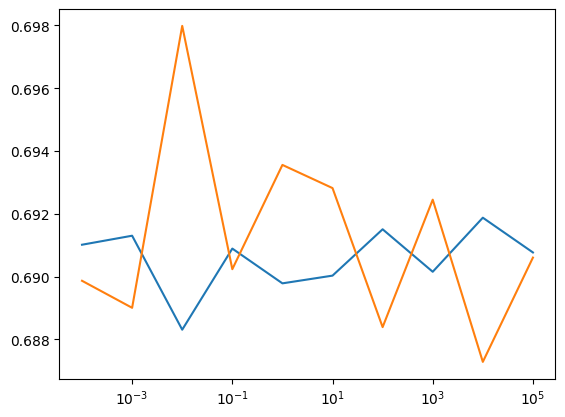

In [30]:
import matplotlib.pyplot as plt

training_scores = []
test_scores = []
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for C in c_values:
    training_score1, test_score1 = svm_run(X, y, C=C, degree=13)
    training_score2, test_score2 = svm_run(X, y, C=C, degree=13)
    training_score3, test_score3 = svm_run(X, y, C=C, degree=13)
    training_score4, test_score4 = svm_run(X, y, C=C, degree=13)
    training_scores.append(sum([training_score1, training_score2, training_score3, training_score4]) / 4)
    test_scores.append(sum([test_score1, test_score2, test_score3, test_score4]) / 4)

plt.plot(c_values, training_scores)
plt.plot(c_values, test_scores)
plt.xscale('log')
plt.show

## Multilayer Perceptron

In [31]:
from sklearn.neural_network import MLPClassifier

def mlp_run(X, y, hidden_layer_sizes):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
    mlp.fit(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    training_score = mlp.score(X_train, y_train)
    test_score = mlp.score(X_test, y_test)

    return (training_score, test_score)

In [32]:
print_results(mlp_run(X, y, (10)))

Training set score: 0.65
Test set score: 0.64


In [33]:
print_results(mlp_run(X, y, (100, 100, 100)))

Training set score: 0.70
Test set score: 0.71


In [34]:
print_results(mlp_run(X, y, (100, 100, 100, 100)))

Training set score: 0.69
Test set score: 0.69


We found that the multilayer perceptron performs just as well as the support vector machine no matter and its accuracy seems to max at 71 percent or so, no matter how much power we throw at it.

# Other Fun Data Visualizations

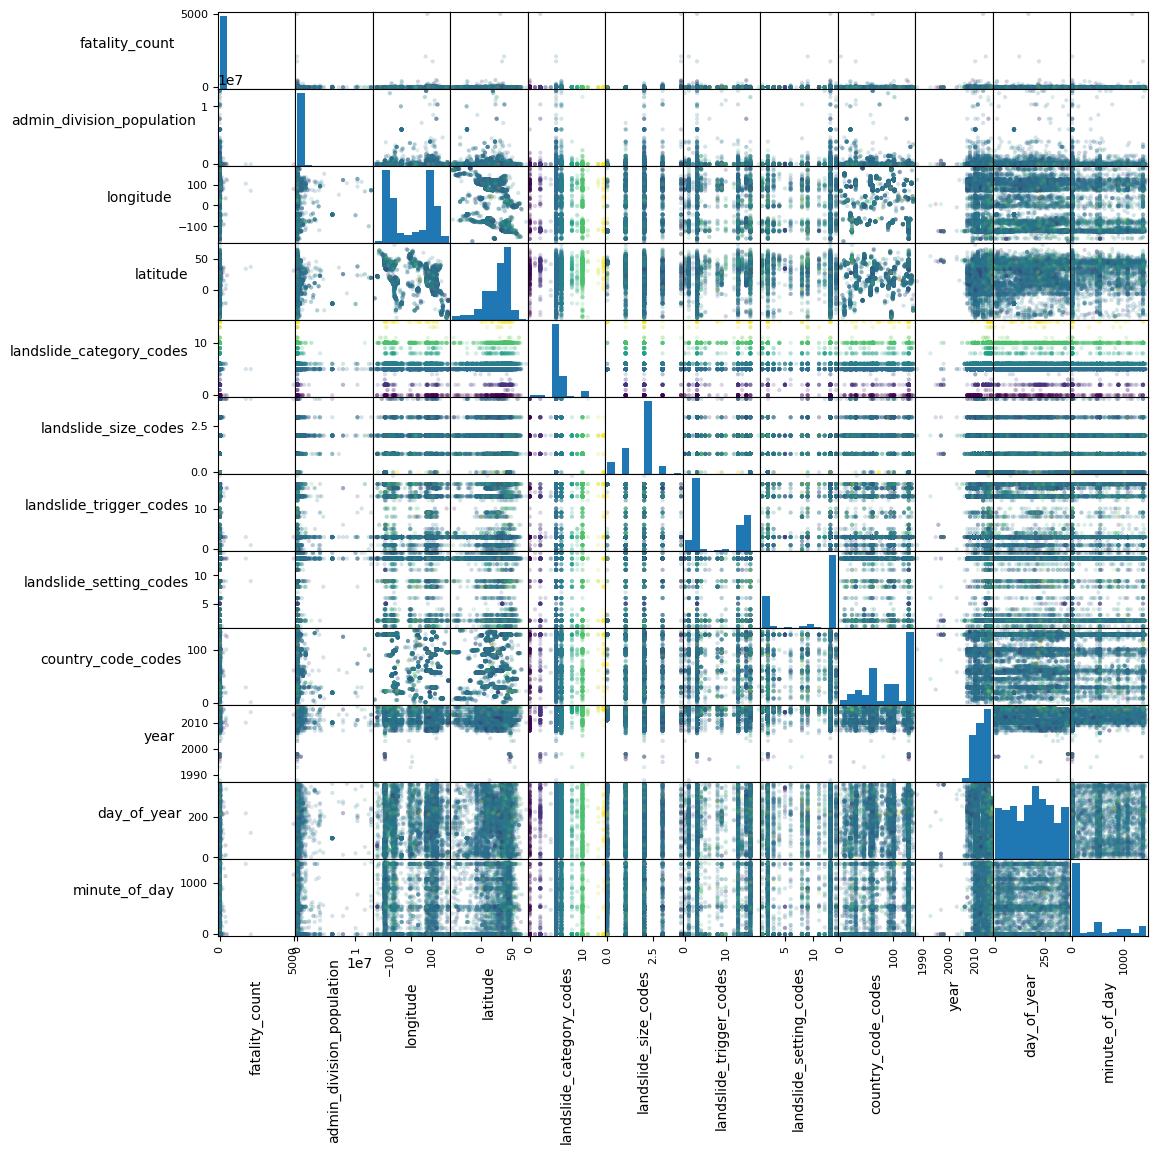

In [35]:
from pandas.plotting import scatter_matrix

smatrix = scatter_matrix(nan_filtered_df, alpha=0.2, c=nan_filtered_df['landslide_category_codes'], figsize=(12, 12), diagonal="hist")

# label rotation code written by Stef: https://stackoverflow.com/a/58626024
for ax in smatrix.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

### Examples of Different Categories of Landslides

earth flow:
https://www.youtube.com/shorts/bYnTXkIJaOI

